# [E-02] Classfifcation_digits

# 미니 프로젝트 (1) load_digits : 손글씨를 분류해 보자

## 첫 시도

cloud 환경이 아닌 local(m1 맥북) 환경에서 테이스 한 결과임을 참고 바란다.

sklearn 손글씨 dataset을 활용하여 분류해 보자.


### 1. 모듈 import

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### 2. 데이터 준비  

- load_digits 메서드를 사용합니다.
- digits_data에 Feature data 지정
- digits_label에 Label(target) data 지정


In [2]:
digits = load_digits()
digits_data = digits.data
print(digits_data.shape, '\n')

digits_label = digits.target
print(digits_label.shape, '\n')
print(digits_label[:20],'\n')
digits.target

(1797, 64) 

(1797,) 

[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9] 



array([0, 1, 2, ..., 8, 9, 8])

- digits_data에 1797개의 데이터가 각각 64개의 정보를 담고 있다.
- digits_label에도 1797개의 데이터가 있음을 확인
- digits_label의 처음부터 20개 데이터를 확인하여 0 ~ 9까지의 값으로 구성된 것 확인



### 3. 데이터 이해하기

다루어야 할 데이터를 자세히 살펴보자.

- Target Names 출력해 보기
- 데이터 Describe 해 보기


In [3]:
print(digits.target_names)

[0 1 2 3 4 5 6 7 8 9]


- digits 데이터 셋의 Target Names을 확인
- 0 ~ 9 까지의 숫자


In [4]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

- digits 데이터셋의 설명을 통해서도 기본적인 정보확인 가능

### 4. 데이터 분리

In [5]:
X_train, X_test, y_train, y_test = train_test_split(digits_data,
                                                   digits_label,
                                                   test_size=0.2,
                                                   random_state=15)

print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test), '\n')
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

X_train 개수:  1437 , X_test 개수:  360 

(1437, 64) (1437,)
(360, 64) (360,)


- digits 데이터 셋을 학습용 데이터와 테스트용 데이터로 분리
- test 데이터 셋의 크기는 전체 데이터셋의 20% 적용하여
- 학습용 데이터 1437개, 테스트용 데이터 360개로 분리
- 데이터 분리할 때 랜덤으로 섞기 위해 random_state=15 적용

### 5. 다양한 모델로 학습시키기

1. Decision Tree 사용해 보기
2. Random Forest 사용해 보기
3. SVM 사용해 보기
4. SGD Classifier 사용해 보기
5. Logistic Regression 사용해 보기

In [6]:
# 각 모델 import
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

# 모델별 변수에 저장
decision_tree = DecisionTreeClassifier(random_state=15)
random_forest = RandomForestClassifier(random_state=15)
svm_model = svm.SVC()
sgd_model = SGDClassifier()
lr_model = LogisticRegression()

### 5.1 Decision Tree

In [7]:
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred_decision_tree))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        31
           1       0.84      0.82      0.83        38
           2       0.73      0.87      0.80        38
           3       0.71      0.74      0.73        27
           4       0.94      0.80      0.87        41
           5       0.87      0.94      0.90        35
           6       0.87      0.89      0.88        38
           7       0.91      0.94      0.93        34
           8       0.79      0.77      0.78        35
           9       0.80      0.77      0.79        43

    accuracy                           0.84       360
   macro avg       0.85      0.85      0.84       360
weighted avg       0.85      0.84      0.85       360



### Decision Tree를 이용한 결과

- accuracy : 84%



### 5.2 Random Forest

In [8]:
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)

print(classification_report(y_test, y_pred_random_forest))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        31
           1       0.97      0.97      0.97        38
           2       1.00      1.00      1.00        38
           3       0.96      0.96      0.96        27
           4       0.95      0.98      0.96        41
           5       0.97      1.00      0.99        35
           6       1.00      0.97      0.99        38
           7       0.97      1.00      0.99        34
           8       0.97      0.94      0.96        35
           9       0.98      0.98      0.98        43

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.98      0.97      0.97       360



### Random Forest를 이용한 결과

- accuracy : 97%



### 5.3 SVM

In [9]:
svm_model.fit(X_train, y_train)
y_pred_svm_model = svm_model.predict(X_test)

print(classification_report(y_test, y_pred_svm_model))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.95      1.00      0.97        38
           2       1.00      1.00      1.00        38
           3       0.96      0.96      0.96        27
           4       0.98      0.98      0.98        41
           5       1.00      1.00      1.00        35
           6       1.00      1.00      1.00        38
           7       1.00      1.00      1.00        34
           8       0.97      0.94      0.96        35
           9       0.98      0.98      0.98        43

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



### SVM을 이용한 결과

- accuracy : 98%



### 5.4 SGD Classifier

In [10]:
sgd_model.fit(X_train, y_train)
y_pred_sgd_model = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred_sgd_model))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.93      0.97      0.95        38
           2       0.97      1.00      0.99        38
           3       0.93      0.93      0.93        27
           4       0.98      0.98      0.98        41
           5       0.95      1.00      0.97        35
           6       1.00      0.97      0.99        38
           7       0.94      1.00      0.97        34
           8       0.97      0.94      0.96        35
           9       1.00      0.91      0.95        43

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



### SGD Classifier를 이용한 결과

- accuracy : 95%



### 5.5 Logistic Regression

In [11]:
lr_model.fit(X_train, y_train)
y_pred_lr_model = lr_model.predict(X_test)

print(classification_report(y_test, y_pred_lr_model))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.95      0.97      0.96        38
           2       1.00      0.97      0.99        38
           3       0.96      0.93      0.94        27
           4       0.98      1.00      0.99        41
           5       0.97      0.97      0.97        35
           6       1.00      0.97      0.99        38
           7       1.00      1.00      1.00        34
           8       0.92      0.97      0.94        35
           9       0.98      0.95      0.96        43

    accuracy                           0.97       360
   macro avg       0.98      0.97      0.97       360
weighted avg       0.98      0.97      0.98       360



/opt/homebrew/Caskroom/miniforge/base/envs/aiffel/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Logistic Regression을 이용한 결과

- accuracy : 97%


### 모델별 accuracy  현황

    - Decision Tree : 84%
    - Random Forest : 97%
    - SVM : 98%
    - SGD Classifier : 95%
    - Logistic Regression : 97% 

## 결론

- *모델의 성능을 평가하는 척도는 손글씨의 숫자가 무엇인지 정확히 예측하는 것이기에 **정확도(accuracy)**를 이용하는 것이 적합한 것으로 생각된다.*
- *특히, SVM의 경우 **98%**의 높은 accuracy가 나왔기에 해당 프로젝트에서는 **SVM**을 사용하는 것이 가장 적합하다고 판단*
- *대체로 5가지 모델에서 이미지 3, 8에 대한 정확도가 떨어지는 것으로 나타난다. 두가지 이미지가 사람도 자주 실수하는 숫자이기도 한것 처럼 형상이 서로 비슷한 부분이 많아서 그런것이 아닌가 하는 추측을 해본다.*


## 추가 사항

- 위 5.5 Logistic Regression에서 아래와 같은 warning message가 나와서 어떤 내용인지 찾아보았다.

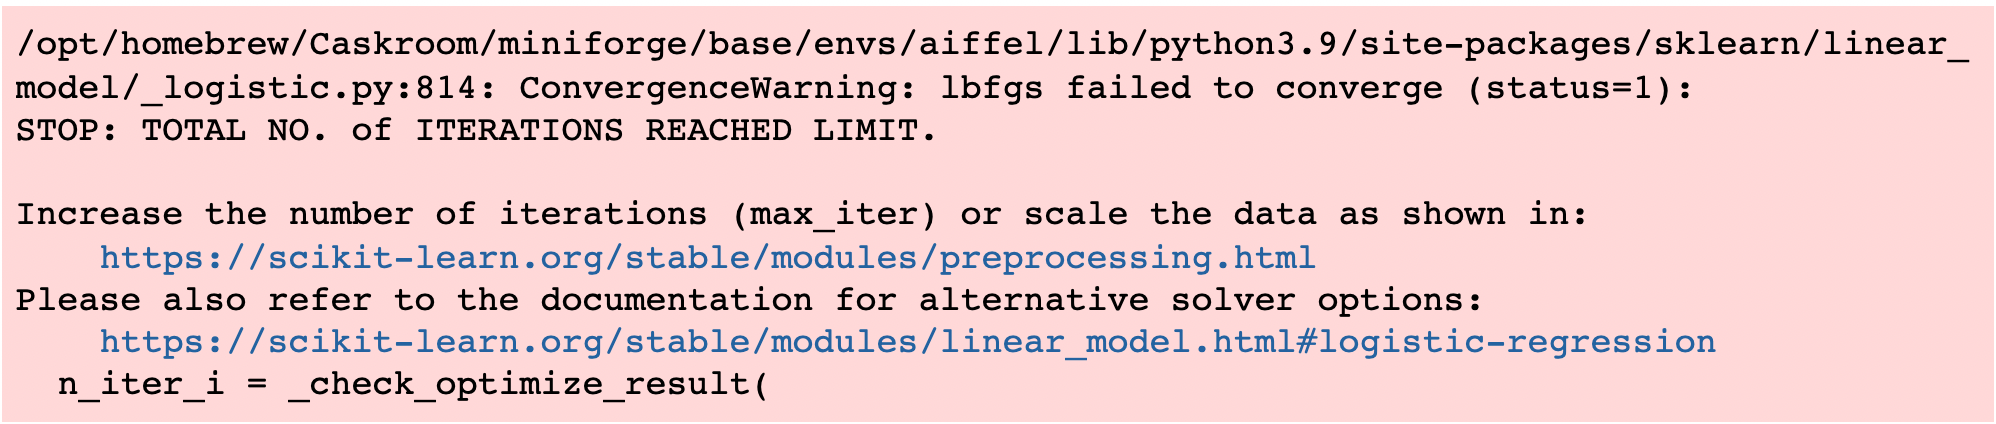

- 구글링 검색으로 알아본 내용이 아래와 같았다. 

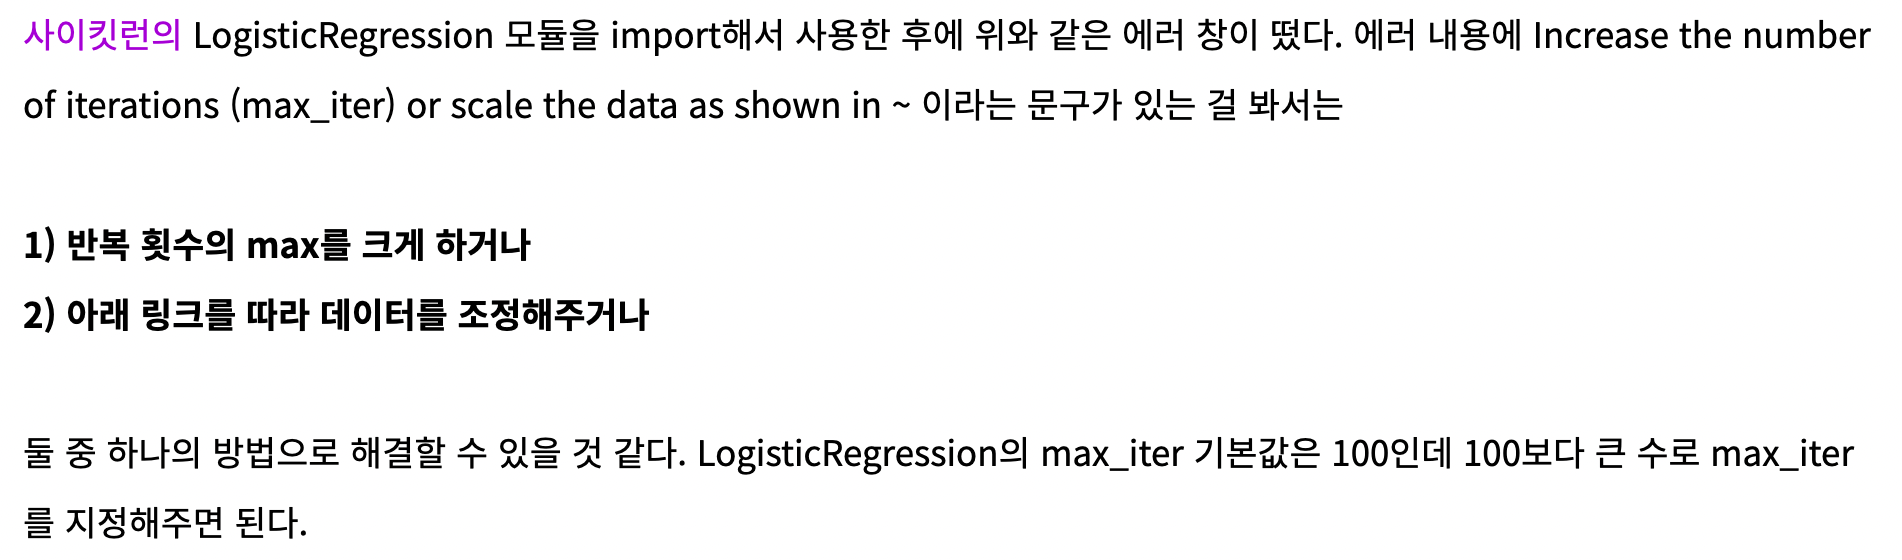

- 위와 같이 해결방안이 있어서 아래와 같이 수정하여 진행을 해보니 해결되었다. ***어떤한 궁금증을 해결하면서 느끼게 되는 성취감은 짜릿함***을 선사해 주는 것 같다. 
정확하게 이해는 할 수 없지만 좀 더 알아보려구 한다.

In [12]:
lr_model = LogisticRegression(max_iter=4000)  # max_iter 값을 1000~4000까지 1000단위씩 변경해서 찾음

lr_model.fit(X_train, y_train)
y_pred_lr_model = lr_model.predict(X_test)

print(classification_report(y_test, y_pred_lr_model))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.95      0.97      0.96        38
           2       1.00      0.97      0.99        38
           3       0.96      0.93      0.94        27
           4       0.93      1.00      0.96        41
           5       0.94      0.97      0.96        35
           6       1.00      0.97      0.99        38
           7       1.00      1.00      1.00        34
           8       0.94      0.94      0.94        35
           9       0.98      0.95      0.96        43

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



precision 값이 0.98 -> 0.97로 살짝 변경된거 외엔 다른점은 없는 것 같다.